# Subclassing Properties
* We will continue with SARS Cov 2 variant, but we will add a variant property that validates against the known variants of concern.
* 

In [3]:
class Virus:
    def __init__(self, name, reproduction_rate, resistance):
        self.name = name
        self.reproduction_rate = reproduction_rate
        self.load = 1
        self.host = None

    def infect(self, host):
        self.host = host

    def reproduce(self):
        if self.host is not None:
            self.load *= (1 + self.reproduction_rate)

            should_mutate = getrandbits(1)
            print(f"Should mutate: {should_mutate}")

            if should_mutate:
                try:
                    self.mutate()
                except AttributeError:
                    pass

            return True, f"Virus reproduced in {self.host}. Viral load: {int(self.load)}"

        raise AttributeError("Virus needs to infect a host before being able to reproduce.")


class RNAVirus(Virus):
    genome = "ribonucleic"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the cytoplasm of {self.host} cells")


class DNAVirus(Virus):
    genome = "deoxyribonucleic"

    def reproduce(self):
        # success, status = Virus.reproduce(self)
        success, status = super().reproduce()

        if success:
            print(f"{self.name} just replicated in the nucleus of {self.host} cells")


class Coronavirus(RNAVirus):
    pass


class SARSCov2(Coronavirus):
    def __init__(self, variant):
        super().__init__("SARSCovid2", 2.49, 1.3)
        self.variant = variant

    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protein")

In [9]:
class SARSCov2(Coronavirus):
    known_variants = ["alpha", "beta", "gamma", "epsilon"]

    def __init__(self, variant):
        super().__init__("SARSCovid2", 2.49, 1.3)
        self.variant = variant

    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien")

    @property
    def variant(self):
        return self._variant

    @variant.setter
    def variant(self, value):
        if value.lower() not in self.known_variants:
            raise ValueError("Expected a known variant of concern")
        
        self._variant = value.lower()

    


In [10]:
cv = SARSCov2("ALPHA")

In [11]:
cv.__dict__

{'name': 'SARSCovid2',
 'reproduction_rate': 2.49,
 'load': 1,
 'host': None,
 '_variant': 'alpha'}

In [12]:
cv.variant = "Something Else"

ValueError: Expected a known variant of concern

In [13]:
cv.variant = "beta"

In [14]:
cv.variant

'beta'

In [ ]:
class DoubleMutant(SARSCov2):
    pass

Note: The variant property is not known to the subclass.


# Inheritance 
class -> object
As we've seen throughout this course, the lifeblood of object oriented programming are objects, and objects are instantiated from classes which act as a blueprint that define theattributes and behaviors.

* Objects are instantiated from classes which act as a blueprint that define the attributes and behaviors that certain type of object should have.
* inheritance allows us to extend this framework.
* Inheritance is an object oriented programming concept that offers us a mechanism to create a new classes that derive behavior and attributes from another class without needeing to implement and rewrite everything from the scratch.
* The way we define class relationship via inheritance is by specifying the class that we're inheriting from the parentheses at class definition.



In [2]:
# Super class, base class, or parent class

class Virus:
    pass

# Derived class, subclass, subtype, or child class
class RNAVirus(Virus):
    pass

class CoronaVirus(RNAVirus):
    pass

class SARSCov2(CoronaVirus):
    pass


In [3]:
issubclass(SARSCov2, CoronaVirus)

True

In [4]:
issubclass(SARSCov2, Virus)

True

RNAVirus class inherits from Virus class

RNAVirus class is called as derived class or subclass or child class 
* so when we use inheritance, we establish a subclass super class terminology. We use inheritance, we establish a subclass super class terminology. We establish some sort of hierarchy.
- We establish some sort of hierarchy.
- In other words, these hierarchies are most meaningful when they help us define "is a" relationship.
- In otherwords, these hierarchies are most meaningful, when they help us define is a relationships. 

# Inheritance helps us define "is a" relationship



# Inheritance helps us to create some sort of Transitive Relation or Transitivity
What is transitive relation?
* In mathematics, a relation R on a set X is transitive if, for all elements a, b, c in X whenever R releates a to b and b to c, then R also relates a to c. Each partial order as well as each equivalence relation needs to be transitive.

# REcap of Inheritance
1. Inheritance offers us a mechanism for creating new classes that modify or extend the behavior of existing classes.
2. Inheritance establishes hierarchies between classes, e.g., super/base/parent class -> sub/child clsas.
3. well designed inheritance hierarchies define is a relationships between classes.

# What is inheritance good for?
The single most obvious and simple use of inheritance is to extend the functionality of an existing class without duplicating code or needing to modify that existing class.
- The single most obvious and simple use of inheritance is to extend the functionality of an existing clsas without duplicating code or needing to modify that existing class.

In [6]:
class Virus:
    # name: 
    # reproduction_rate
    # resistance 
    # host 
    # viral_log

    def __init__(self, name, reproduction_rate, resistance):
        self.name = name
        self.reproduction_rate = reproduction_rate
        self.load = 1
        self.host = None

    def infect(self, host):
        self.host = host

    def reproduce(self):
        if self.host is not None:
            self.load *= (1 + self.reproduction_rate)

            return True, f"Virus reproduced in {self.host}. Viral load: {int(self.load)}"
        
        return AttributeError("Virus needs to infect a host before being able to reproduce.")

In [7]:
v = Virus("KrsnaConsciousness", 1.2, 1.1)

In [8]:
v.reproduce()


AttributeError('Virus needs to infect a host before being able to reproduce.')

In [9]:
v.infect("hummans")

In [11]:
v.reproduce()

(True, 'Virus reproduced in hummans. Viral load: 2')

In [15]:
# Inheritance
class RNAVirus(Virus):
    genome = "ribonucleic acid"

    def reproduce(self):
        success, status =  Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the cytoplasm of {self.host} cells")


class DNAVirus(Virus):
    genome = "deoxyribonucleic acid"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} Just replicated in the nucleus of {self.host} cells")
            

In [16]:
r = RNAVirus("KCON", 1.1, 0.2)

In [18]:
r.infect("monkey")
r.reproduce()

KCON just replicated in the cytoplasm of monkey cells


# Recap of What is inheritance good for?
* One of the most important uses of inheritance is to add or modify functionality from an existing class without modifying that class.
* One of the most important uses of inheritance is to add or modify functionality from an existing class without modifying that class. This ocntributes to code reuse  and orgranization as well as object hierarchies that are easy to reason about.

* This contributes to code, reuse, and organization as well as object hierarchies that are easy to reason about.


# All class inherit from object
* All class in python are inherit from object type


In [ ]:
class Virus:
    pass

class RNAVirus(Virus):
    pass


In [19]:
object

object

In [20]:
object()

In [21]:
o1 = object()
o2 = object()

In [22]:
o1 is o2

False

# The above defined objects are different objects
Eventhough they are built from the same base object, they represent different constructs in memory.
* This is quite similar to what we saw with custom class instances in the section on double underscores

* All classes in python derive from object unless we override dunder EQ in one of those user defined classes, we will inherit the equality implementation from object, which relies on the ID of the instance and therefore is what we see here with two instances of the same type always comparing unequal.



In [23]:
# There is a __repr__ which gives us the default object representation.
o1.__repr__()

'<object object at 0x7fccf4aaec40>'

In [24]:
o1.__hash__()

8782390931140

In [25]:
# By calling class, we create instance of it.

class TempVirus:
    pass

In [26]:
[TempVirus()]

In [27]:
# if you do over and over (calling class names, we get different instances of it)
[TempVirus() for i in range(3)]

The reason object is callable is because its type implements __call__

In [ ]:
# the below classes are completely identical and functionally equal

class TempVirus:
    pass

class TempVirus(object):
    pass


In [28]:
[TempVirus() for i in range(3)]
# the TempVirus is callable, because object is callable as defined above (both
# class definitions are same).
# object is callable is because its type implements __call__

# All classes inherit from object

Recap:
1. all python classes implicitly inherit from object, whether that is specified in the class definition or not.
2. this inheritance guarantees certain base behavior in all subclasses, like the fact they're callable, have some default representation, and more.
3. All python classes implicitly inherit from object, whether that is specified in the class definition or not.
- this inheritance gurantees certain base behavior in all subclasses, like the fact they're callable, have some default representation, and more.
* Objects really exists to provide these reasonable, barebones defaults to all subclasses, so as to enable child classes to only customize or extend only what is relevant to the use case, rather than re-implement everything.


# Method Resolution Order
* We have seen in previous lectures and sort of relied on an interesting interplay between the methods defined in the base class and those defined in the subclass.

* specifically when the methods have exactly the same name.

# Attribute Lookup Rules
1. When we reference an attribute on an object, Python first checks the instance dictionary.

2. When we reference an attribute on an object, python first checks the instance dictionary, also referenced by dunder dict.
* double underscore dictionary


In [29]:
class TempVirus:
    attr = "some_class_attribute"
    attr_other = "some_other_class_attribute"

    def __init__(self, attr):
        self.attr = attr
    

In [30]:
# __dict__
v1 = TempVirus("instance_attribute")

v1.attr

'instance_attribute'

In [31]:
v1.__dict__

{'attr': 'instance_attribute'}

# Note: if the attribute is not found in the instance dictionary, python then checks in the class namespace, in other words the class double underscore dict.
# example, if we say v1.attr_other, we do get some value eventhoug we 
# or this binding is not found in the instance dictionary.

# so where do you come from? Well it comes from the class namespace.

So python first checks the instance, if it does not find an attribute by the name "attr_other", so then it goes to the type of the namespace of the type of that instance or in other words, the namespace of the class of that instance.
- and there it finds "attr_other" class attribute bind to adder other and gives us that.
-  so again this is simply equivalent to saying temp virus dot dict or alternatively v1 class dict. Okay, these are completely synonyms.




In [32]:
# example, if we say v1.attr_other, we do get some value eventhoug we 
# or this binding is not found in the instance dictionary.

# so where do you come from? Well it comes from the class namespace.

v1.attr_other

'some_other_class_attribute'

In [33]:
type(v1)

__main__.TempVirus

In [34]:
type(v1).__dict__

mappingproxy({'__module__': '__main__',
              'attr': 'some_class_attribute',
              'attr_other': 'some_other_class_attribute',
              '__init__': <function __main__.TempVirus.__init__(self, attr)>,
              '__dict__': <attribute '__dict__' of 'TempVirus' objects>,
              '__weakref__': <attribute '__weakref__' of 'TempVirus' objects>,
              '__doc__': None})

TempVirus.__dict__ is synonymous to v1.__class__.__dict__

In [35]:
TempVirus.__dict__

mappingproxy({'__module__': '__main__',
              'attr': 'some_class_attribute',
              'attr_other': 'some_other_class_attribute',
              '__init__': <function __main__.TempVirus.__init__(self, attr)>,
              '__dict__': <attribute '__dict__' of 'TempVirus' objects>,
              '__weakref__': <attribute '__weakref__' of 'TempVirus' objects>,
              '__doc__': None})

In [36]:
v1.__class__.__dict__

mappingproxy({'__module__': '__main__',
              'attr': 'some_class_attribute',
              'attr_other': 'some_other_class_attribute',
              '__init__': <function __main__.TempVirus.__init__(self, attr)>,
              '__dict__': <attribute '__dict__' of 'TempVirus' objects>,
              '__weakref__': <attribute '__weakref__' of 'TempVirus' objects>,
              '__doc__': None})

# is this the end?
Technically no, after the class namespace, python will check the parent classes one by one up the hierarchy eventually stopping the object.

* so if an attribute by that name cannot be found after all of this lookup is done, an attribute error is thrown

So really, the order to remember here is as follows:
# instance -> instance to class -> class to super class is possible if there's more than one to object else attribute error.

There's always the possibility that something that we're trying to access simply does not exist. So if you want imaginary attribute throws, attribute error, why? because, it doesn't exist in the instance.

# instance -> class -> superclass(s) -> object, else attribute error

In [37]:
v1.imaginary

AttributeError: 'TempVirus' object has no attribute 'imaginary'

In [38]:
TempVirus.__bases__

(object,)

In [39]:
RNAVirus.__bases__

(__main__.Virus,)

In [40]:
CoronaVirus.__bases__

(__main__.RNAVirus,)

# double underscore bases (__bases__) simply shows the base class for a given subclass.
* But the fuller lookup chain that we described here is visible under a different attribute called double underscore MRO

# What is MRO?
MRO stands for Method Resolution Order


In [41]:
RNAVirus.__mro__

(__main__.RNAVirus, __main__.Virus, object)

In [42]:
CoronaVirus.__mro__

(__main__.CoronaVirus, __main__.RNAVirus, __main__.Virus, object)

Note: Both attributes and methods are lookedup by exactly the same rules
* When we try to access a name from an instance, python tries to figure out what we mean. Eventually the name may be bound to a single value.

* it may hold some data, for example, or to a function that is bound to an object which is all the methods are

# Method Resolution Order:
1. Attributes and method lookup follows a well defined order:
instance -> class -> superclass -> object
2. the lookup stops on first match, i.e., its possible for our method/attribute name to show up more than once int he lookup chain, but those later matches are not reachable; first match wins
3. this lookup is the reason we have the ability to reference attributes or call methods defined in classes (or their parents from within instances of subclasses)
4. the lookup could be easily sourced from the read-only __mro__attribute, available on the class.



# Subclass Overrides
* As we discussed in the previous lectures on MRO, descendant classes are always checked before their ancestors.
* So when a subclass defines an attribute with the same name as one in its parent class, the method resolution will stop with the method found in the subclass.
* So when a subclass defines an attribute with the same name as one in its parent class, the method resolution will stop with the method found in the subclass.

# the first match wins

When this happens, we said that the subclass is overriding the definition in the superclass, and we  saw this earlier in this section.


In [43]:
class Virus:
    def __init__(self, name, reproduction_rate, resistance):
        self.name = name
        self.reproduction_rate = reproduction_rate
        self.load = 1
        self.host = None

    def infect(self, host):
        self.host = host

    def reproduce(self):
        if self.host is not None:
            self.load *= (1 + self.reproduction_rate)

            return True, f"Virus reproduced in {self.host}. Viral Load: {int(self.load)}"
        
        raise AttributeError("Virus needs to infect a host before being able to reproduce")
    

class RNAVirus(Virus):
    genome = "riboneucleic"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the cytoplasm of {self.host} cells")


class DNAVirus(Virus):
    genome = "deoxyribonucleic"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the nucleus of {self.host} cells")

            

        

In [44]:
class CoronaVirus(RNAVirus):
    def infect(self):
        print("A coronavirus specific method with a diffeent signature from the parent's")

        raise NotImplementedError()
    
    

In [45]:
cv = CoronaVirus("Krsna Consciousness", .1, .99)

In [46]:
cv.infect()

A coronavirus specific method with a diffeent signature from the parent's


NotImplementedError: 

In [47]:
CoronaVirus.__mro__

(__main__.CoronaVirus, __main__.RNAVirus, __main__.Virus, object)

# Note: The subclass overridden method comes first in these classes.
* So i think the point is clear. Sub class overriding or estending their parent's behavior, and we've described the exact plane attribute and method lookup dynamics that make this possible ofcourse, we could go beyond this and expolre other variations of this interplay between parent and child or superclasses and subclasses.

# Other variations of this interplay between parent and child or superclasses and subclasses.

For example: we could have methods that only the subclasses define, but the parent exclusively calls.


* So this is a bit of an inversion. Conceptually, this may sound a bit mind bending. We could have methods that only the subclasses define, but the parent exclusively calls.


In [49]:
from random import getrandbits

for i in range(4):
    print(getrandbits(1))

0
0
1
0


In [1]:
from random import getrandbits
class Virus:
    def __init__(self, name, reproduction_rate, resistance):
        self.name = name
        self.reproduction_rate = reproduction_rate
        self.load = 1
        self.host = None

    def infect(self, host):
        self.host = host

    def reproduce(self):
        if self.host is not None:
            self.load *= (1 + self.reproduction_rate)

            should_mutate = getrandbits(1)
            print(f"should mutate: {should_mutate}")

            if should_mutate:
                try:
                    self.mutate()

                except AttributeError:
                    pass
            


            return True, f"Virus reproduced in {self.host}. Viral Load: {int(self.load)}"
        
        raise AttributeError("Virus needs to infect a host before being able to reproduce")
    

class RNAVirus(Virus):
    genome = "riboneucleic"

    def reproduce(self):
        #success, status = Virus.reproduce(self)
        success, status = super().reproduce(self)

        if success:
            print(f"{self.name} just replicated in the cytoplasm of {self.host} cells")


class DNAVirus(Virus):
    genome = "deoxyribonucleic"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the nucleus of {self.host} cells")

In [2]:
class CoronaVirus(Virus):
    pass

class SARSCov2(CoronaVirus):
    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien Krsna Consciousness")

cv = SARSCov2("originalKCON", 99999, 999999)

cv.infect("KCON")

for _ in range(5):
    print(cv.reproduce(), "\n")


should mutate: 1
The originalKCON virus just mutated its spike protien Krsna Consciousness
(True, 'Virus reproduced in KCON. Viral Load: 100000') 

should mutate: 1
The originalKCON virus just mutated its spike protien Krsna Consciousness
(True, 'Virus reproduced in KCON. Viral Load: 10000000000') 

should mutate: 1
The originalKCON virus just mutated its spike protien Krsna Consciousness
(True, 'Virus reproduced in KCON. Viral Load: 1000000000000000') 

should mutate: 0
(True, 'Virus reproduced in KCON. Viral Load: 100000000000000000000') 

should mutate: 0
(True, 'Virus reproduced in KCON. Viral Load: 10000000000000000000000000') 



# Recap: Parent handle some of the logic and child subclass handle some of the handle.
1. Descendant classes are always checked beore their ancestors
2. if a descendant implements a method having the same name as its ancestor class, the descendant's implementation will take precedence.
3. this applies to plain attributes as well as methods.
4. The MRO lookup rules could be used flexibly to model various types of interplay between child and parent implementations.




# Better Parent Delegation Super()
We've seen several examples of subclasses overriding parent behavior or attributes.
* This lecture will revisit this concept but in other direction.
* so we'll talk about when a subclass needs to delegate to the parent.
in fact, we're already doing this. If you recall subclass implementation of the reproduce method first delegates to the parent virus before proceeding to print some subclass specific informaiton.
* That means, before we get to the subclass logic, we refernce the parent. A more robust way to do this delgation to parent in python is using the super built in.
* A more robust way to do this delegation to parent in python is using the super built in.
So super returns a temporary object of the super class that allows us to call its methods.
# Super returns a temporary object of the super class that allows us to call its methods.

# super is returning an object as an instance of the parent class, which then allows us to call the parent reproduce method using super.

We could access this parent instance from inside any method in the subclass.

# What is the benefit of using super instated as class name?
What is the benefit of using super here instead of referring to the parent class by name explicitly?
isn't this cleaner?

a. one of the biggest advantage of using this super based approach is that it results in code that is mroe easy to maintain or refactor.
b. one of the biggest advantage of using this super bases approach is that it results in code that is more easy to maintain or refactor.

for example, if we change our definitions ina way that alters the class name for virus, our subclasses would not need to be updated if they reference their parent using super class.

# Indirection 
in computer programming, indirection also called dereferencing is the ability to reference something using a name, refernce, or container instead of the vlaue itself. 
* Indirection also called dereferencing is the ability to reference something using a name, reference, or container instated of value itself.
the most common form of indirection is the act of manipulating a value through its memory address. For example, accessing a variable through the use of a pointer. A stored pointer that exists to provide a reference to an object by double indirection is called an indirection node. in some older computer architectures, indirect words supported a variety of more or less complicated addressing modes.

# All probles in computer science can be solved by another level of indirection ( the fundamental theorem of software engineering"). This is often deliberately mis quoted with abstratction layer substituted for level of indirection. 

* it is  easier to move a problem around for example, by moving the problem to a different part of the overall network architecture than it is to solve it.
corollary, it is always possible to add another level of indirection.

# Object oriented programming makes use of indirection extensively, a simple example being dynamic dispatch. Higher level examples of indirection are the design patterns of the proxy and the proxy server. Delegation is another clasic example of an indirection pattern. In strongly typed interpreted languages with dynamic datatypes, most variable references require a level of indirection: first the type of the variable is checked for safety, and then the pointer ot hte actual value is dereferenced and located.

* so instead of value itself, for example, the parent class name virus, we're indirectly referring to it using some other construct for single inheritance.
* This is one of the biggest benefits of using super instead of literal class names.

There is one of the biggest benefits of using super instated of literal class names:
* But when we get to multiple inheritance, we'll see how super also helps in ensuring the respective method in the parent classes does not get called more than once, which is a huge benefit for our purposes.

Super is used to avoid referencing base classes explicitly which may result in more maintainable code.
* Super is used to avoid referencing base classes explicitly which may result in more maintainable code.

# Recap: super
1. the pythonic way to reference the parent class from a subclass is to use the super() built in.
2. super()) returns an instance of the parent class, enabling us to directly reference its methods and attributes.
3. super() could be called within any subclass method as well as at any step, i.e., not necessarily the first thing we do.







In [ ]:
# Subclass __init__
"""

* The most common use of delegation is the dunder init
* we have seen several times already, is the magic method responsible for instance, initialization.
Initialization where we commonly bind the attributes to values on that newly created instance represented by 
self.

we commonly bind attributes to values on that newly created instance represented by self.

This is also known as the constructor method by the self itself.


"""

* We commonly bind attributes to values on that newly created instnace represented by self.
* This is done by using __init__ and also commonly known as the constructor method by some.

* Now if we define a dunder init on a subclass, say our SARS-Cov2 here, it would appear to work just fine. 


In [4]:
class CoronaVirus(Virus):
    pass

class SARSCov2(CoronaVirus):
    # Adding dunder init
    def __init__(self, variant):
        self.variant = variant

    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien Krsna Consciousness")

cv = SARSCov2("originalKCON")



NameError: name 'Virus' is not defined

In [6]:
cv

In [7]:
cv.reproduction_rate

AttributeError: 'SARSCov2' object has no attribute 'reproduction_rate'

* As a traditional, we bind it to instance.
* There is a serious issue here, none of the attributes we commonly expect of viruses are actually initialized in this instance. There is no reproduction rate for example:
* There is no reproduction rate for example:
* As a result, the instance we've created does not have the attributes that we set in the virus thunder.
* intotal, there are 4 or 5 other attributes. So that's the big takeway that it's actually up to the subclass to properly initialize the superclass.
That's a big takeaway, that it's actually up to the subclass ot properly initialize the superclass by delegating to the right init.

# in otherwords, if a subclass defines a dunder init, then any necessary pareent initialization is up to us. Python wont take care of that.

* Notice that when we say super().__init__, python goes all the way up to virus init
- Eventhough immediate parent class is RNA. And the reason is that RNA virus does not implement an init, neither does corona. 







In [8]:
cv.__dict__

{'variant': 'originalKCON'}

In [3]:
class CoronaVirus(Virus):
    pass

class SARSCov2(CoronaVirus):
    # Adding dunder init
    def __init__(self, variant):
        super().__init__("SARSCov2", 6336.99, 9.9999)
        self.variant = variant

    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien Krsna Consciousness")

cv = SARSCov2("originalKCON")
cv.reproduction_rate


NameError: name 'Virus' is not defined

In [18]:
cv.reproduction_rate

6336.99

In [15]:
cv.__dict__

{'name': 'SARSCov2',
 'reproduction_rate': 6336.99,
 'load': 1,
 'host': None,
 'variant': 'originalKCON'}

In [19]:
SARSCov2.__mro__

(__main__.SARSCov2, __main__.CoronaVirus, __main__.Virus, object)

In [12]:
cv.reprduction_rate

AttributeError: 'SARSCov2' object has no attribute 'reprduction_rate'

# super is the pythonic way to go about this delegation to parent.

# Misuse looks something likes this
- parent - child class relationship defined using inheritance.
- where the child defined an init only for the purpose of calling the parent init.
- 

In [20]:
class Parent:
    def __init__(self):
        print("parent init")

class Child(Parent):
    def __init__(self):
        super().__init__()

In [21]:
c = Child()

parent init


From the above code we see that parent init printed out.
* it just happens though, that in python this is completely unnecessary. And why is that?
# well, if the subclass simply does not implement this init python will still travel up the inheritance hierarychy and identify the closeest implementaiton.

Python will still travel up the inheritance hierarychy and idenfy the closest implementation.


In [22]:
class Parent:
    def __init__(self):
        print("parent init")

class Child(Parent):
    #def __init__(self):
    #    super().__init__()
    pass

In [23]:
ch = Child()

parent init


# If a subclass implements the dunder init, that implementation will take precedence and its parents init will not be called unless that is the subclass dunder init.
* Again, if a subclass implements the dunder init, that implementaiton will take precedence and its parents init will not be called unless that is the subclass dunder init.

# Important Note: if a subclass does not define a dunder init when we create an instance of that subclass, python will still attempt to call dunder init on it.
* And if a subclass does not have that implementation, the call will bubble up to the parent, the parent's parent and so on all the way up to object until it finds an implementation for dunder init.

* if neither the subclass nor any of its parents define a dunder init python ends up calling the dunder init on object, which if you recall, is the grand ancestor of all classes.

# Recap:
1. the subclass defines if the subclass defines a dunder init, it is its responsibility to properly initialize all applicable attributes.
2. if the subclass does not define a __init__, python automatic invocation at instance initialization will result in the parent's init if applicable, being called.










# Subclassing properties

* We will discuss or take a closer look at how properties work in the context of inheritance.


In [8]:
from random import getrandbits
class Virus:
    def __init__(self, name, reproduction_rate, resistance):
        self.name = name
        self.reproduction_rate = reproduction_rate
        self.load = 1
        self.host = None

    def infect(self, host):
        self.host = host

    def reproduce(self):
        if self.host is not None:
            self.load *= (1 + self.reproduction_rate)

            should_mutate = getrandbits(1)
            print(f"should mutate: {should_mutate}")

            if should_mutate:
                try:
                    self.mutate()

                except AttributeError:
                    pass
            


            return True, f"Virus reproduced in {self.host}. Viral Load: {int(self.load)}"
        
        raise AttributeError("Virus needs to infect a host before being able to reproduce")
    

class RNAVirus(Virus):
    genome = "riboneucleic"

    def reproduce(self):
        #success, status = Virus.reproduce(self)
        success, status = super().reproduce(self)

        if success:
            print(f"{self.name} just replicated in the cytoplasm of {self.host} cells")


class DNAVirus(Virus):
    genome = "deoxyribonucleic"

    def reproduce(self):
        success, status = Virus.reproduce(self)

        if success:
            print(f"{self.name} just replicated in the nucleus of {self.host} cells")

In [14]:
class CoronaVirus(Virus):
    pass

class SARSCov2(CoronaVirus):
    known_variants = ["alpha", "beta", "gamma", "epsilon"]

    def __init__(self, variant):
        super().__init__("KCON:Subclassing properties", 99.99, 9999.0)
        self.variant = variant # Remember this is not an instance variable, its a property
    
    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien")

    @property
    def variant(self):
        return self._variant
    
    @variant.setter
    def variant(self, value):
        if value.lower() not in self.known_variants:
            raise ValueError(f"Expected a known variant of concern: {value}")
        
        self._variant = value.lower()




In [17]:
# At this point we shall be able to create instance of specific variants

cv = SARSCov2("ALPHA")

In [18]:
cv.__dict__

{'name': 'KCON:Subclassing properties',
 'reproduction_rate': 99.99,
 'load': 1,
 'host': None,
 '_variant': 'alpha'}

In [20]:
cv.variant = "KCON"

ValueError: Expected a known variant of concern: KCON

In [21]:
cv.variant = "beta"

In [22]:
cv.variant

'beta'

In [23]:
class DoubleMutant(SARSCov2):
    pass

In [ ]:
# Lets see how this class behaves simply by virtue of inerting from SARS-CoV-2 
# first things first, can we create new instances with new variants.

#Ah, it would turn out that we are still constrained to the known variants of concern.


In [26]:
# This doesnt work because there is no double under init defined under DoubleMutant
DoubleMutant("new variant")

ValueError: Expected a known variant of concern: new variant

In [28]:
class DoubleMutant(SARSCov2):
    @SARSCov2.variant.setter
    def variant(self, value):
        self._variant = value.lower()


In [29]:
dv = DoubleMutant("KCON")

In [30]:
dv.__dict__

{'name': 'KCON:Subclassing properties',
 'reproduction_rate': 99.99,
 'load': 1,
 'host': None,
 '_variant': 'kcon'}

In [37]:
class CoronaVirus(Virus):
    pass

class SARSCov2(CoronaVirus):
    known_variants = ["alpha", "beta", "gamma", "epsilon"]

    def __init__(self, variant):
        super().__init__("KCON:Subclassing properties", 99.99, 9999.0)
        self.variant = variant # Remember this is not an instance variable, its a property
    
    def mutate(self):
        print(f"The {self.name} virus just mutated its spike protien")

    @property
    def variant(self):
        return self._variant
    
    @variant.setter
    def variant(self, value):
        if value.lower() not in self.known_variants:
            raise ValueError(f"Expected a known variant of concern: {value}")
        
        self._variant = value.lower()


In [38]:
class DoubleMutant(SARSCov2):
    @property
    def variant(self):
        print("Getter from the subclass")
        return self._variant
    
    @variant.setter
    def variant(self, value):
        self._variant = value.lower()

    @variant.deleter
    def variant(self):
        del self._variant # deleting the attribute from the instance name space.

The above defined subclass and property lives in the subclass itself.

In [35]:
dv2 = DoubleMutant("KCON: Yay completed subclassing properties")
dv2.variant

Getter from the subclass


'kcon: yay completed subclassing properties'

In [36]:
dv2.variant

Getter from the subclass


'kcon: yay completed subclassing properties'

In [ ]:
"""
The original parent class has its own property that lives in its namespace.
so even though these two classes are quite related to each other. 

Double mutant is a subclass of the parent class SARSCov2

They have different implementation of the same named property and the implementation plays a different rules.

So the parent does the validation and child does not.

So if we try to set something to the parent the parent will complain.
so if we try to set something to the parent the parent will complain.

but if we try to set something on an instance of double mutant, the child, the double mutant will not complain.



"""

# Its important to note that even though we have this relationship, we have defined the same named property in two different classes that are otherwise related.
Please see above comments for above note

Even though we have parent child relation ship and we have defined the property with same name in both parent class and child class, and they are related, they do behave as if they wree completely separate.

We have same named property defined in two classes otherwise they are related

# There's no inheritance of property like functionality going on here

# Recap: Subclassing properties
1. Properties defined in the parent could be extended/modified in the subclass
2. Because properties live in the namespace of the class in which they're defined, referring to them from the subclass requires the use of a fully qualified name in the subclass, i.e., one that specifies the parent class name.

Because properties live in the namespace of the class in which they're defined, referring to them from the subclass requires the use of fully qualified name in the subclass i.e., one that specifies the parent class names.

When inheriting the properties, we reserve the flexibility to only extend or modify the methods we care about, e.g., any combination of get set del.





# Extending Built-ins
Built in data structures: a list or dict but we need the behavior tweaked in one way or another.

# creating a subclass out of these built ins is probably a pretty good place to start.

Example:
So, we want to improve the interface of the python dictionary so that it doesn't throw us a key error
exception when it cannot find an item we're looking for.

So what do we mean by that?
we're going to create a quick example here


In [39]:
population = {
    "Krsna": 99,
    "KCON": 99,
    "USAKCON":999
}

In [40]:
population["KCON"]

99

Behind the scenes, python is converting this square bracket syntac to a call todunder get item and it's actually that method that throws the exception.




In [41]:
population["KConsciousness"]

KeyError: 'KConsciousness'

In [ ]:
# Our example is to inherit from dict and then modify associated built in magic method that is responsible for throwing this error.


# Extended Builtins
Built in data structures:
* list or dict

# improve the interface of the python dictionary, if we cannot define the item that we are defining for.


In [2]:
kcondev = {
    "BG": 999,
    "BT": 9999999
}

In [3]:
kcondev['BG']


999

Python is converting this square bracket syntax to a call to double underscore get item and its actually that method that throws the exception.
* Square bracket syntax to a call to double underscore get item and its actually that method that throws the exception.



In [4]:
kcondev['ch']

KeyError: 'ch'

In [5]:
kcondev.__getitem__("BG")

999

# Mission
our mission is to build a nicer dictionary so, so to speak, so that instead of this exception, we get a somewhat funny and may be variable messgae indicated that an item by that key was not found.

* or we program it in such a way that instead of throwing an error, we raise the exception and catch it and display a variable message indicated that an item by that key was not found or something like that...

Rather than build a dictionary tlike data structure from absolute scratch, which by the way we could do for our purposes, may be its easier to simply inherit from dict and then modify the associated built in magic method that is responsible for throwing this error.


In [7]:
from random import choice

class ModifyDict(dict):
    not_found = ['404', 'wait, what?', 'Try again or dont?']

    def __getitem__(self, item):
        if not item in self:
            return choice(self.not_found)
        
        return super().__getitem__(item)

In [12]:
kcondev1 = ModifyDict({
    "BG": 999,
    "BT": 9999999
})

In [13]:
kcondev1['BG']

999

In [19]:
kcondev1['CT']

'Try again or dont?'

In [20]:
for i in range(10):
    print(kcondev1['Chaitanya'])

404
404
Try again or dont?
wait, what?
wait, what?
404
wait, what?
404
wait, what?
Try again or dont?


# it meets our expectation here just to show its random
Recap:

* In python, we could extend the behavior of built in data structures just like we  do with regular user defined ones.
* to do that, we simply define a subclass that inherits from the respective built in, and modify or enhance only the behaviour or we care about.




In [ ]:
# Something we siwh python lists had is this ability to calculate averages when list consitutes

In [22]:
l = [1,2,3,4,5]
average(l)

NameError: name 'average' is not defined

In [23]:
sum(l)

15

In [24]:
class AvgList(list):
    def average(self):
        return sum(self) /len(self)

In [26]:

l2 = [9,99,999]
l3 = AvgList(l2)
l3.average()

369.0

In [27]:
l3 = AvgList(1,2,3,4,5)

TypeError: list expected at most 1 argument, got 5

# What if we want to support the ability to also instantiate by simply passing in an arbitrary number or nurmeric arguments, let's say?


In [28]:
l4 = AvgList(9,8,7,6,5)

TypeError: list expected at most 1 argument, got 5

# How do we fix the above error and how do we evolve our interface here

* We want to accept the arbitrary number of arguments
* How do we do that?
    Well, to do that for average list, we simply implement dunder init in the subclass, so we implmenting the subclass this time.

    Well, to do that for average list, we simply implement dunder init in the subclass, therefore it takes the precedence over that implemented in list.
    But also at the same time, it becomes our responsibility to delegate to the dunder init of the parent.

    * 

In [33]:
class AvgList(list):
    def __init__(self, *args): # arbitrary number of args 
        # take the arbitrary number of args and interpret them
        if args and type(args[0]) != list:
            super().__init__(args)
        else:
            super().__init__(args[0])

    @property
    def average(self):
            return sum(self) / len(self)


In [30]:
l4 = [6,5,4,3,2]

In [34]:
l5 = AvgList([1,10,20,90])
print(l5.average)

30.25


In [35]:
l6 = AvgList(1,10,20,90)
print(l6.average)

30.25


# Extended builtin usin list recap
1. built in types could be extedned both to add functionality as well customize existing behavior.
2. this includes subclass overrides of specific dunders or the definition of new methods and attributes.
3. some commonly extended built ins are list, set, dict, and str
4. int and float are also often inherited in creating numeric abstractions with custom behavior.



# Beware of the pitfalls


In [1]:
# Below is the class which demonstrates an example of extended builtins
from random import choice

class FunnyDict(dict):
    not_found = ["404", "Wait, What?", "Try again or don't"]

    def __getitem__(self, item):
        if not item in self:
            return choice(self.not_found)
        
        return super().__getitem__(item)
    

In [2]:
rd = {
    "KCON": 99,
    "KCONHW": 99999999,
    "KCONNFD":999999
}

fd = FunnyDict({
    "KCON":99,
    "KCONHW": 99999999,
    "KCONNFD":999999
})

In [3]:
rd["Material"]

KeyError: 'Material'

In [5]:
fd["Material"]

"Try again or don't"

In [6]:
rd.get("KCON")

99

In [7]:
fd.get("KCON")

99

In [8]:
fd.get("Material")

# In this case, the python interpreter refuses to delegate to our overridden getitem implmentation and all of a sudden what appear to be a decent working customization, now looks to have created an inconsistent interface.


In [9]:
# Below is the class which demonstrates an example of extended builtins
from random import choice

class FunnyDict(dict):
    not_found = ["404", "Wait, What?", "Try again or don't"]

    def __getitem__(self, item):
        if not item in self:
            return choice(self.not_found)
        
        return super().__getitem__(item)
    
    def get(self, value):
        return self.__getitem__(value)
    

In [10]:
rd = {
    "KCON": 99,
    "KCONHW": 99999999,
    "KCONNFD":999999
}

fd = FunnyDict({
    "KCON":99,
    "KCONHW": 99999999,
    "KCONNFD":999999
})

In [11]:
fd.get("material")

"Try again or don't"

In [ ]:
# lot of these builtins have highly optimized low level code written in C, and the interpreter makes no gurantee that our override will even be taken into consideration.


In [ ]:
# update or pop doesn't work


# As showin in the above example, we could run into inconsistencies like this one in other dictionary methods.
* for example like update, updaet or pop, for example.
* They may not work and the issue even extends beyond dictionaries aplies to other builtins in python, that have an optimization.
* so in other words, if we subclass a builtin directly and override some of its thunders, we're setting ourselves up for some surprises.

* okay, so what do we do? What is the solution for this?

For this purposes: We also have collections  - Container data types
# Collections - container datatypes

# Collection modules:
This module implements specialized container datatypes providing alternatives to python's general purpose built in containers, dict, list, set, and tuple.
* so if we're trying to build a fancier type of python dictionary instead of subclassing dict, we rather inherit from user dict.
- named tuple() - factory function for creating tuple subclasses with named fields.
- deque: list like container with fast appends and pops on either end
- chainMap - dict like class for creating a single view of multiple mappings.
- counter - dict subclass for counting hashable objects
- orderedDict - dict subclass that remembers the order entries weer added
- defaultdict - dict subclass that calls a factory function to supply missing values
- userDict - wrapper around dictionary objects for easier dict subclassing
- userList - wrapper around list objects for easier list subclassing
- userString - wrapper around string objects for easier string subclassing.

* Chainmap: a ChainMap class is provided for quickly linking a number of mappings so they can be treated as a single unit. it is often much faster than creating a new dictionary and running multiple update() calls.
- The class can be used to simulate nested scopes and is useful in templating.


* So if we are trying to build a fancier type of python dictionary instead of subclassing dict, we rather inherit from user dict.
- which gives us a wraper around dictionary that makes it easy to extend dictionary while avoiding any of the surprises we saw earlier.


In [13]:
from random import choice
from collections import UserDict

class FunnyDict(dict):
    not_found = ["404", "Wait, What?", "Try again or don't"]

    def __getitem__(self, item):
        if not item in self:
            return choice(self.not_found)
        
        return super().__getitem__(item)
    
    def get(self, value):
        return self.__getitem__(value)
    

In [14]:
rd = {
    "KCON": 99,
    "KCONHW": 99999999,
    "KCONNFD":999999
}

fd = FunnyDict({
    "KCON":99,
    "KCONHW": 99999999,
    "KCONNFD":999999
})

In [16]:
fd.get("MAT")

'Wait, What?'

In [20]:
# Wether we use get or square bracket, the interface is consistent
fd["MATERIAL"]

'404'

# what we are doing here is subclassing user dict, which is a wrapper, a special object around the built in dictionary that python offers us specifically for the purpose of extending and customizing dictionary with confidence.



# Collection  - Container datatypes
* This module implements specialized containers datatypes providing alternatives to python's general purpose built in containers dict, list, set, and tuple

* named tuple() factory function for creating tuple suclasses with named fields.
* deque - list like container with fast appends and pops on either end
* chainmap - dict like class for creating a single view of multiple mappings.
* counter - dict subclass for counting hashable objects.
* orderDict - dict subclass that remembers the order entries were added.
default dict - dict subclass that calls a factory function t supply missing values.
* UserDict -  wrapper around dictionary objects for easier dict subclassing.
userList - wrapper around list objects for easier list subclassing
userString - wrapper around string objects for easier string subclassing.



In [39]:
from random import choice
from collections import UserDict

class FunnyDict(UserDict):
    not_found = ["404", "Wait, What", "Try again!"]

    def __getitem__(self, item):
        print("Item is", item)
        if not item in self:
            return choice(self.not_found)
        
        return super().__getitem__(item)
    
    


In [41]:
fd1 = FunnyDict({
    "KCON": 99,
    "KRSNA": 9999,
    "CHAIT": 999999
})

In [42]:
fd1.get("KCON")

Item is KCON


99

In [40]:
fd = FunnyDict({
    "KCON":99,
    "KCONHW": 99999999,
    "KCONNFD":999999,
    "CAN": 111
})

In [35]:
fd.get("CAN")

'404'

# with the above implementation of using wraper UserDict class, the interface is consistent  - meaning either using get or using square bracket to get the value - the implementation is consistent.


In [43]:
fd.get("CAR")

Item is CAR


'404'

In [44]:
fd["CAR"]

Item is CAR


'Wait, What'

In [45]:
fd.data

{'KCON': 99, 'KCONHW': 99999999, 'KCONNFD': 999999, 'CAN': 111}

# Adapter pattern

Software design called adapter pattern: In software design engineering, the adapter pattern is a software design pattern (also known as wrapper, an alternative naming shared with decorator pattern) that allows the interface of an existing class to be used as another interface. It is often used to make existing classes work with others without modifying their source code.

* It is often used to make existing classes work with others without modifying their source code. 

* An example is an adapter, that comments the interface of a document object model of an xml documentinto the structure that can be displayed.

Recap:
* Extending built ins directly in python could be tricky because the interpreter makes no gurantees that our overrides will take precedence over the high efficiency parts of the code implemented in low level c.
* some common side effects of this are inert overrides (they are ignored) and inconsistent interfaces (spotty coverage)

* to sidestep all of this, python makes available some special wrapper under the collections module that are easily extnsible.




# Inheritance Breakthrough
* Inheritance is not themost importnat thing in object oriented programming.
* An equally important technique is called composition: 

# What is composition?
Composition: one object is made to contain others and produce more complex constructs.
* One object is made to contain others and produce more complex constructs.
* Whenever two classes are involved, one of them should inherit from the other, and that's not true.
* Good rule of thumb here is to think whether we're dealing with is a  or has  a relationships.

# important: Good rule of thumb here is are you dealing with is a or has a relationships.

# Inheritance is not the most important thing in OOP.
Example: An apple is a type of fruite, it makes good sense to inherit Apple from a fruit class.

* Inheritance has a drawback or it does comes with a drawback that when we create a subclasses, by definition we are we  end up establishing a tight hierarchical coupling between a parent or a bunch of parents and then a child. 
* but in reality, especially over the longer term, code may need to be more , you know flexible, it may turn out that we may end up writing more reusable code if we build highly cohesive ojects that combines well in various different contexts. 

# Composition: One object is made to contain others and produce more complex constructs.

* Inheritance is the clear choice for cases where we need to create more specialized versions of classes that already exists.

* For example, when we need a more detailed abstraction of a given object inheritance is great, but in building and maintaining larger code bases, composition plays atleast just as big a role.

# Recap:
Use inheritance for objects that naturally align is a relationships

* Prefer composition for those that conceptually fit "has-a" relationships.

# Inheritance - "IS-A" Relationship
# Composition - "Has - A" Relationship.





- 



* 



Skill Challenge #8
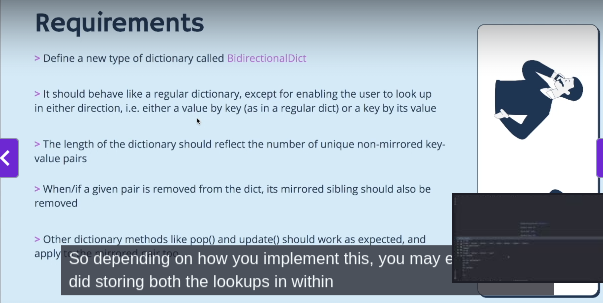

# Skill challenge #8:
* Define a new type of dictionary called BidirectionalDict
* It should behave like a regular dictionary, except for enabling the user to look up in either direction, i.e., either a value by key (as in a regular dict) or a key by its value).
* The length of dictionary should reflect the number of unique non mirrored key value pairs.
* When/if a given pair is removed from the dict, its mirrored sibling should also be removed.
* other dictionary methods like pop() and update() should work as expected, and apply to the mirrored pair too.



In [46]:
from collections import UserDict

class BidirectionalDict(UserDict):
    #bd['a'] = 'b'
    # a->b, b->a

    # del bd['a']
    # both b-> a and a-> b are removed.

    def __setitem__(self, key, value):

        if key in self:
            del self[key]

        if value in self:
            del self[value]
        
        # for each binding we creating two entries.
        super().__setitem__(key, value)
        super().__setitem__(value, key)

    def __len__(self):
        return super().__len__() // 2
    
    def __delitem__(self, key):
        super().__delitem__(self[key])
        super().__delitem__(key)

    #  POP and Update should work as expected.